<a href="https://colab.research.google.com/github/will-cotton4/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame. (CHECK)
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI). (CHECK)
- Validate that you have no missing values. (CHECK)
- Add informative names to the features. (CHECK)
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables) (CHECK)

At the end, print the first five rows of the dataset to demonstrate the above. (CHECK)

#### Expand following cells for solutions.

### Load the data as a `pandas` data frame/ Add informative names to the features.

In [0]:
import pandas as pd

cancer_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')
cancer_data.columns = ['age', 'op_year', 'pos_ax_nodes', 'survival_status']


### Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).

In [6]:
cancer_data.count()

age                305
op_year            305
pos_ax_nodes       305
survival_status    305
dtype: int64

### Validate that you have no missing values.

In [7]:
cancer_data.isna().sum()

age                0
op_year            0
pos_ax_nodes       0
survival_status    0
dtype: int64

### Encode survival variable as 0/1 for not survival/survival/ Print header.

In [13]:
cancer_data['survival_status'] = cancer_data['survival_status'].replace({2:0})
cancer_data.head()

,age,op_year,pos_ax_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

#### Expand following cells for solutions.

### Two tables

#### First, let's take a look at the relationship between age range (i.e., bin age first) and survival status. 

In [20]:
# Bin age into groups
age_bins = pd.cut(cancer_data['age'], 10)
pd.crosstab(cancer_data['survival_status'], age_bins, normalize = 'columns')

age,"(29.947, 35.3]","(35.3, 40.6]","(40.6, 45.9]","(45.9, 51.2]","(51.2, 56.5]","(56.5, 61.8]","(61.8, 67.1]","(67.1, 72.4]","(72.4, 77.7]","(77.7, 83.0]"
survival_status,,,,,,,,,,
0,0.133333,0.074074,0.326087,0.301887,0.327273,0.219512,0.292683,0.222222,0.142857,1.0
1,0.866667,0.925926,0.673913,0.698113,0.672727,0.780488,0.707317,0.777778,0.857143,0.0


  Interesting. I would have expected the correlation to be much cleaner--that as age increases the probability of survival monotonically decreases, since the `survival_status` statistic just measures whether the patient survives five years--even if the patient dies of some other, unrelated misfortune.

  Perhaps there's a confounding variable or two here; perhaps the patients who survive to be older might be a healthier population on average than the patients who contract breast cancer earlier in life. Perhaps the genes or life circumstances that lead a patient to contract breast cancer early also make the cancer more deadly or make the patient more vulnerable to other illnesses. 

#### Let's take a look at the relationship between positive axillary nodes (again, binned) and survival_status.

In [27]:
node_bins = pd.cut(cancer_data['pos_ax_nodes'], 4)
pd.crosstab(cancer_data['survival_status'], node_bins, normalize = 'columns')

pos_ax_nodes,"(-0.052, 13.0]","(13.0, 26.0]","(26.0, 39.0]","(39.0, 52.0]"
survival_status,,,,
0,0.23913,0.541667,0.333333,0.5
1,0.76087,0.458333,0.666667,0.5


  Again, I would have expected that the survival rate would be more tightly correlated with the number of axillary nodes, but in this case, I think the crosstab doesn't show the whole picture. Looking more closely at the data:

In [29]:
cancer_data['pos_ax_nodes'].sort_values(ascending=False).head(10)

61     52
173    46
214    35
8      30
251    28
226    25
159    24
167    23
42     23
95     23
Name: pos_ax_nodes, dtype: int64

  I was tipped off by those suspiciously clean proportions in the last two columns: there were only five patients with more than 25 positive axillary nodes in this sample, too small a sample to draw any conclusions.

  As with the age analysis above, there's a hidden confounder here: according to healthline.com, most people have between 20 and 40 axillary lymph nodes *total*. One of these patients had 52 positive axillary nodes, which seems a truly incredible level of progression for the disease. Any patient who managed to survive the cancer long enough for it to spread to 52 (or 46, or 35) axillary nodes probably had a higher baseline of health before contracting cancer, so probably would have a better shot at surviving the disease than someone else, all other things equal. The discrepancy might therefore just be a case of survivorship bias: the patients who managed to live long enough to have more than 25 axillary nodes colonized by cancer cells might just be hardier as a population than those who have had fewer nodes colonized.

   But again, these explanations are only conjecture based on limited data; there aren't enough points available to make a robust conclusion in this upper range of axillary nodes.

### Two plots

#### First, we run a pairplot to get a sense of the data visually.

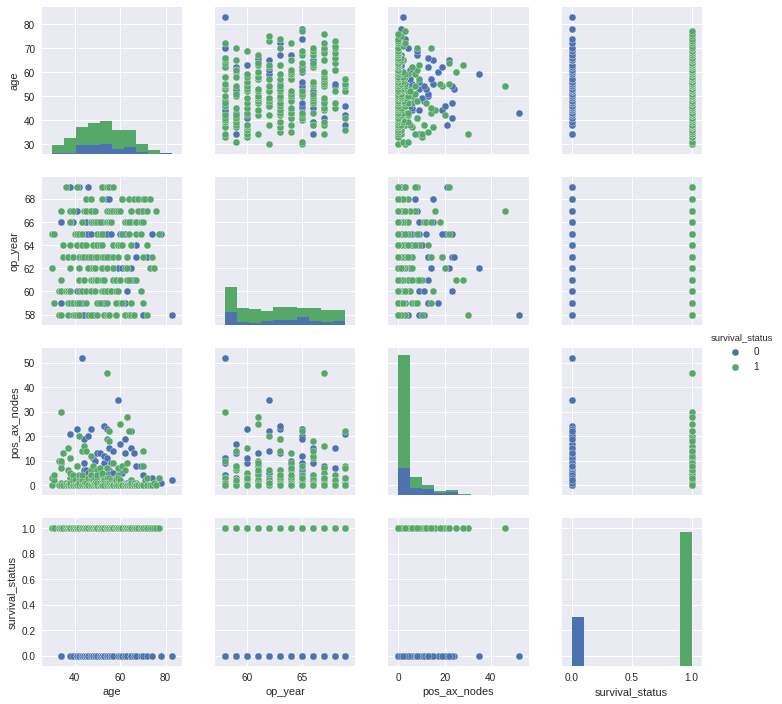

In [39]:
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt # Reluctantly...

# This pairplot colors the data based on the patient's survival status;
# patients who survived five years or longer are represented with green dots,
# and those who didn't are represented with blue dots.

sns.pairplot(cancer_data, hue="survival_status")

#### Now let's take a closer look at two graphs of interest: a heatmap comparison of the number of axillary nodes against survival and a bar graph comparing the survival rates of different age groups against their respective survival rates.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


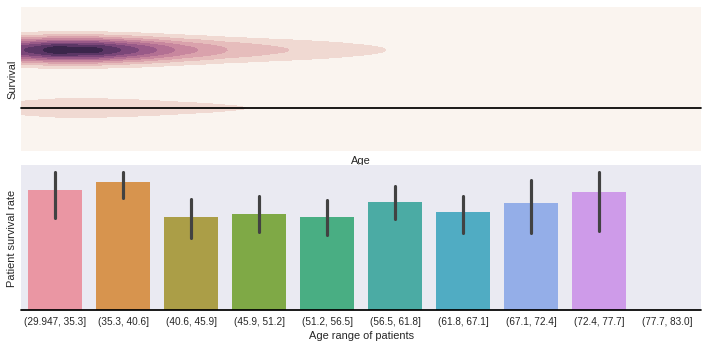

In [59]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

# Heatmap of axillary nodes against survival

sns.kdeplot(cancer_data['pos_ax_nodes'], cancer_data['survival_status'], cmap=cmap, shade=True, cut=5, ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_xlabel("Positive axillary nodes")
ax1.set_ylabel("Survival")

# Age range vs. survival rate

sns.barplot(x=age_bins, y=cancer_data['survival_status'], ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Patient survival rate")
ax2.set_xlabel("Age range of patients")


# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=0)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

I've addressed these questions partially in the text blocks above, but I'll summarize my preliminary conclusions here.

First, the data has too many unreported confounding variables to make any strong conclusions. The data appear on first inspection to suggest, for example, that older patients might be hardier than younger patients--but as noted, we don't have enough information about the relative baseline health qualities of the different demographic groups to draw anything but tentative conclusions about the relationship between age and outcome. 

The relationship between positive axillary nodes and health outcomes seems to hold up on closer inspection (again, absent any more information about the baseline health considerations of individual patients). As one would expect, aside from the few outliers at the top end of the range, patients with more axillary nodes that have tested positive do tend to perform worse than those in the lower ranges.

Both of these variables are likely confounded by the same set of unreported variables: the relative quality of the patient's overall health. If we wish to make more specific predictions about outcomes, we will need to collect more information on this subject, as well as more information about the relative progression of the disease aside from the number of axillary nodes that tested positive.

I am not, of course, an oncologist, but it seems possible that that metric may be insufficient to accurately describe the progression of cancer within a patient's body. For example, one could imagine that a cancer might spread beyond the nodes altogether and metastasize to, for example, the liver or kidneys, so that a patient might have only a few affected nodes but be in quite a dire situation all the same.